In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import libraries and download data

In [ ]:
# from tensorflow.python.keras import *
import tensorflow as tf
import scipy.io as sio # For Matlab file
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow import keras
from google.colab import files
import math
import keras
import keras.utils
from keras import utils as np_utils
# ---------------------
#  Global Parameters
# ---------------------
path = '/content/drive/MyDrive/BER/Save_Data'
no_epoch = 100
m_batch_size = 512
lr = 1e-5
#To download Matlab file
def mat_load(path):
    print('loading data...')
    # load the PS_dBm
    PSdBm = sio.loadmat(path + '/BPSK.vs.SNR.mat')['PS_dBm']
    # load the estimated BER_LT
    BERLT = sio.loadmat(path + '/BPSK.vs.SNR.mat')['BER_LT']
    print('loading complete')
    print('The shape of PS_dBm is: ', PSdBm.shape)
    print('The shape of BER_LT is: ', BERLT.shape)
    return PSdBm, BERLT

# Download data

In [ ]:
# Download data: PSdBm, BERLT
# tf.config.experimental_run_functions_eagerly(True)
# ------------------------------------------
#  Load and generate simulation data
# ------------------------------------------
# path =   # the path of the dictionary containing BPSK.vs.SNR.mat
# Noticed that this is only a default path containing few samples to test if the program can run successfully
# you can download provided train sets or trained weights from the given google driver in readme
PSdBm, BERLT = mat_load(path) 
#print(PSdBm)
PSdBm = np.squeeze(PSdBm) #Remove axes of length one from array
print(PSdBm)
print('The shape of PS_dBm is: ', PSdBm.shape)
BERLT = np.squeeze(BERLT) #Remove axes of length one from array
print(BERLT)
print('The shape of PS_dBm is: ', BERLT.shape)


loading data...
loading complete
The shape of PS_dBm is:  (1, 10000)
The shape of BER_LT is:  (1, 10000)
[-40.        -39.9939994 -39.9879988 ...  19.9879988  19.9939994
  20.       ]
The shape of PS_dBm is:  (10000,)
[4.72823679e-01 4.72804953e-01 4.72786215e-01 ... 8.45870128e-05
 8.44702501e-05 8.43536486e-05]
The shape of PS_dBm is:  (10000,)


# Display curve to fit

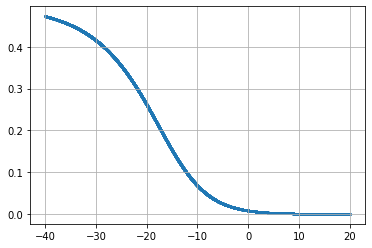

In [ ]:
# Display the dataset
plt.scatter(PSdBm[::1], BERLT[::1], s=2)
plt.grid()
plt.show()
#plt.savefig('dataset.png',dpi=300)
#files.download('dataset.png') 

# Create the model

In [ ]:
# Create the model with two 64 units hidden layers.
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 64)                128       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


# Training

In [ ]:
# Training over 100 epochs
# Training
#model.fit( PSdBm, BERLT, epochs=40, verbose=1)
#model.fit( PSdBm, BERLT, epochs=40, verbose=1, validation_split=0.1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=20, min_lr=lr)
checkpoint = tf.keras.callbacks.ModelCheckpoint('./temp_trained.h5', monitor='val_loss',
                                       verbose=0, save_best_only=True, mode='min', save_weights_only=True)

from tensorflow.keras.callbacks import Callback
history = Callback()
history = model.fit(PSdBm, BERLT, batch_size=m_batch_size,
          epochs=no_epoch, verbose=2, validation_split=0.1, 
          # callbacks=[reduce_lr, checkpoint, history, access])
          callbacks=[reduce_lr, checkpoint, history])

Epoch 1/100
18/18 - 1s - loss: 1.4639 - val_loss: 0.1176 - lr: 0.0010 - 545ms/epoch - 30ms/step
Epoch 2/100
18/18 - 0s - loss: 0.1533 - val_loss: 0.0214 - lr: 0.0010 - 79ms/epoch - 4ms/step
Epoch 3/100
18/18 - 0s - loss: 0.0120 - val_loss: 0.0212 - lr: 0.0010 - 76ms/epoch - 4ms/step
Epoch 4/100
18/18 - 0s - loss: 0.0022 - val_loss: 1.1914e-04 - lr: 0.0010 - 80ms/epoch - 4ms/step
Epoch 5/100
18/18 - 0s - loss: 9.0664e-04 - val_loss: 3.3937e-04 - lr: 0.0010 - 76ms/epoch - 4ms/step
Epoch 6/100
18/18 - 0s - loss: 6.4249e-04 - val_loss: 5.6196e-05 - lr: 0.0010 - 78ms/epoch - 4ms/step
Epoch 7/100
18/18 - 0s - loss: 5.9048e-04 - val_loss: 2.1255e-07 - lr: 0.0010 - 72ms/epoch - 4ms/step
Epoch 8/100
18/18 - 0s - loss: 5.7745e-04 - val_loss: 2.3870e-06 - lr: 0.0010 - 61ms/epoch - 3ms/step
Epoch 9/100
18/18 - 0s - loss: 5.6898e-04 - val_loss: 1.6758e-06 - lr: 0.0010 - 61ms/epoch - 3ms/step
Epoch 10/100
18/18 - 0s - loss: 5.6163e-04 - val_loss: 1.2868e-06 - lr: 0.0010 - 59ms/epoch - 3ms/step
Epoch

# Predict and display

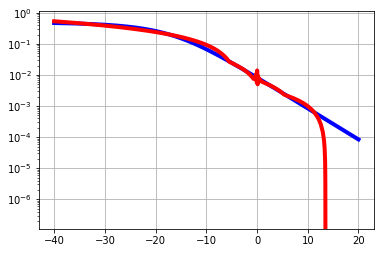

In [ ]:
# Compute the output 
BERLT_predicted = model.predict(PSdBm)

# Display the result
plt.semilogy(PSdBm, BERLT, 'b', linewidth=4)
#plt.plot(PSdBm, BERLT, 'b', linewidth=4)
plt.semilogy(PSdBm, BERLT_predicted, 'r', linewidth=4)
#plt.plot(PSdBm, BERLT_predicted, 'r', linewidth=4)
plt.grid()
plt.show()
#plt.savefig('training.png', dpi=300)
#files.download("training.png") 

# Test

[-35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15]
[[0.45540783]
 [0.38627312]
 [0.31713912]
 [0.24800417]
 [0.17886993]
 [0.1097357 ]
 [0.04060135]
 [0.00572104]
 [0.0033435 ]
 [0.00215528]
 [0.00096772]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


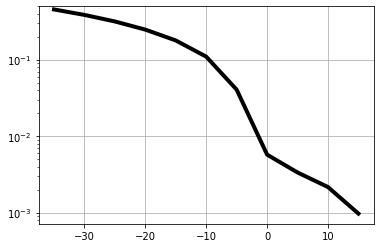

<Figure size 432x288 with 0 Axes>

In [ ]:
# harvest data and draw
model.load_weights('/content/temp_trained.h5')
PS = [-35,-30,-25,-20,-15,-10,-5,0,5,10,15]  
print(PS)
  # One epoch
  #model.fit( PSdBm, BERLT, epochs=1, verbose=1)
  # Compute the output 
  #BERLT_pred = model.predict(PS)
BERLT_pred = model.predict(PS)
print(BERLT_pred)
  # Display the result
  #plt.scatter(PSdBm[::1], BERLT[::1], s=2)
#plt.plot(PS, BERLT_pred, 'r', linewidth=4)
plt.semilogy(PS, BERLT_pred, 'k', linewidth=4)
plt.grid()
plt.ylim(top=0.5)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=0)  
plt.show()
  #plt.savefig('training-' + str(x) +'-epochs.png',dpi=300)
  #files.download('training-' + str(x) +'-epochs.png') 
plt.clf()